# Predict Future Sales

Final project for "How to win a Data Science Competition"

* https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data
* https://www.coursera.org/learn/competitive-data-science/home/welcome

In [2]:
# Importació de mòduls

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Importació de dades

sales_train = pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv')
items = pd.read_csv('competitive-data-science-predict-future-sales/items.csv')
test = pd.read_csv('competitive-data-science-predict-future-sales/test.csv')
shops = pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')
categories = pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')

## Item categories

In [29]:
categories.head(8)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7


In [38]:
len(categories)

84

In [37]:
# Divisió de les categories

categories.iloc[:,0].apply(lambda s: s.split(' - ')).head()

0    [PC, Гарнитуры/Наушники]
1           [Аксессуары, PS2]
2           [Аксессуары, PS3]
3           [Аксессуары, PS4]
4           [Аксессуары, PSP]
Name: item_category_name, dtype: object

## Shops

In [95]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [113]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


## Items

In [55]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [56]:
len(items)

22170

In [99]:
# Categories amb més productes

items[['item_category_id','item_id']]\
    .groupby(['item_category_id'], as_index=False)\
    .count()\
    .sort_values(by='item_id', ascending = False)\
    .head()

,item_category_id,item_id
40,40,5035
55,55,2365
37,37,1780
31,31,1125
58,58,790


In [101]:
categories.loc[categories.item_category_id==40,:]

,item_category_name,item_category_id
40,Кино - DVD,40


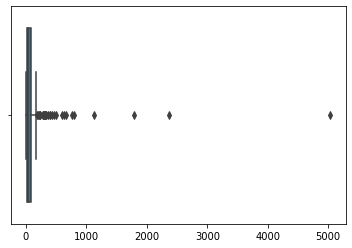

In [98]:
sns.boxplot(items[['item_category_id','item_id']].groupby(['item_category_id'], as_index=False).count())

## Sales

In [148]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [82]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


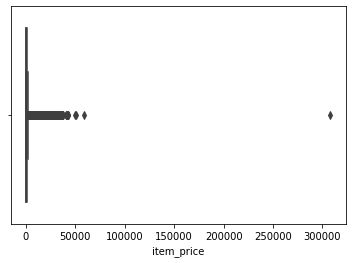

In [81]:
# Outliers: item_price

sns.boxplot(sales_train.item_price)

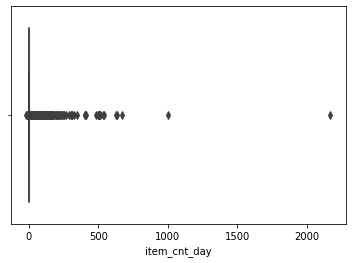

In [83]:
# Outliers: item_cnt_day

sns.boxplot(sales_train.item_cnt_day)

In [106]:
# Preus negatius

sales_train.loc[sales_train.item_price<=0,:]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [103]:
# Devolucions

sales_train.loc[sales_train.item_cnt_day<=0,:].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0


## Test

In [107]:
test.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [114]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


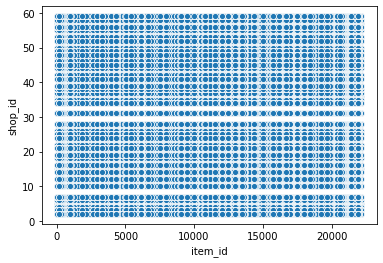

In [115]:
sns.scatterplot(test.item_id, test.shop_id)

In [119]:
test.shop_id.unique()

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45])

## train i test

Shops

In [141]:
np.sort(sales_train.shop_id.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [142]:
np.sort(test.shop_id.unique())

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59])

Items

In [146]:
len(sales_train.item_id.unique())

21807

In [147]:
len(test.item_id.unique())

5100